## Recurrent Neural Network (RNN)

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step.\
A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.\
These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning; they are incorporated into popular applications such as Siri, voice search, and Google Translate.\
Like feedforward and convolutional neural networks (CNNs), recurrent neural networks utilize training data to learn patterns and relationships between inputs and outputs. However, RNNs are unique in that they have a "memory" that allows them to learn sequences of data, making them ideal for tasks that require sequential data processing.\
They are distinguished by their “memory” as they take information from prior inputs to influence the current input and output.\
While traditional deep neural networks assume that inputs and outputs are independent of each other, the output of recurrent neural networks depend on the prior elements within the sequence.\
While future events would also be helpful in determining the output of a given sequence, unidirectional recurrent neural networks cannot account for these events in their predictions.\
Another distinguishing characteristic of recurrent networks is that they share parameters across each layer of the network. While feedforward networks have different weights across each node, recurrent neural networks share the same weight parameter within each layer of the network. That said, these weights are still adjusted in the through the processes of backpropagation and gradient descent to facilitate reinforcement learning.\
Recurrent neural networks leverage backpropagation through time (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data\
 
The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer.

These calculations allow us to adjust and fit the parameters of the model appropriately.
 
BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer.

Through this process, RNNs tend to run into two problems, known as exploding gradients and vanishing gradients.

These issues are defined by the size of the gradient, which is the slope of the loss function along the error curve. When the gradient is too small, it continues to become smaller, updating the weight parameters until they become insignificant—i.e. 0. When that occurs, the algorithm is no longer learning.
 
Exploding gradients occur when the gradient is too large, creating an unstable model. In this case, the model weights will grow too large, and they will eventually be represented as NaN. 
One solution to these issues is to reduce the number of hidden layers within the neural network, eliminating some of the complexity in the RNN model.



## Types of recurrent neural networks

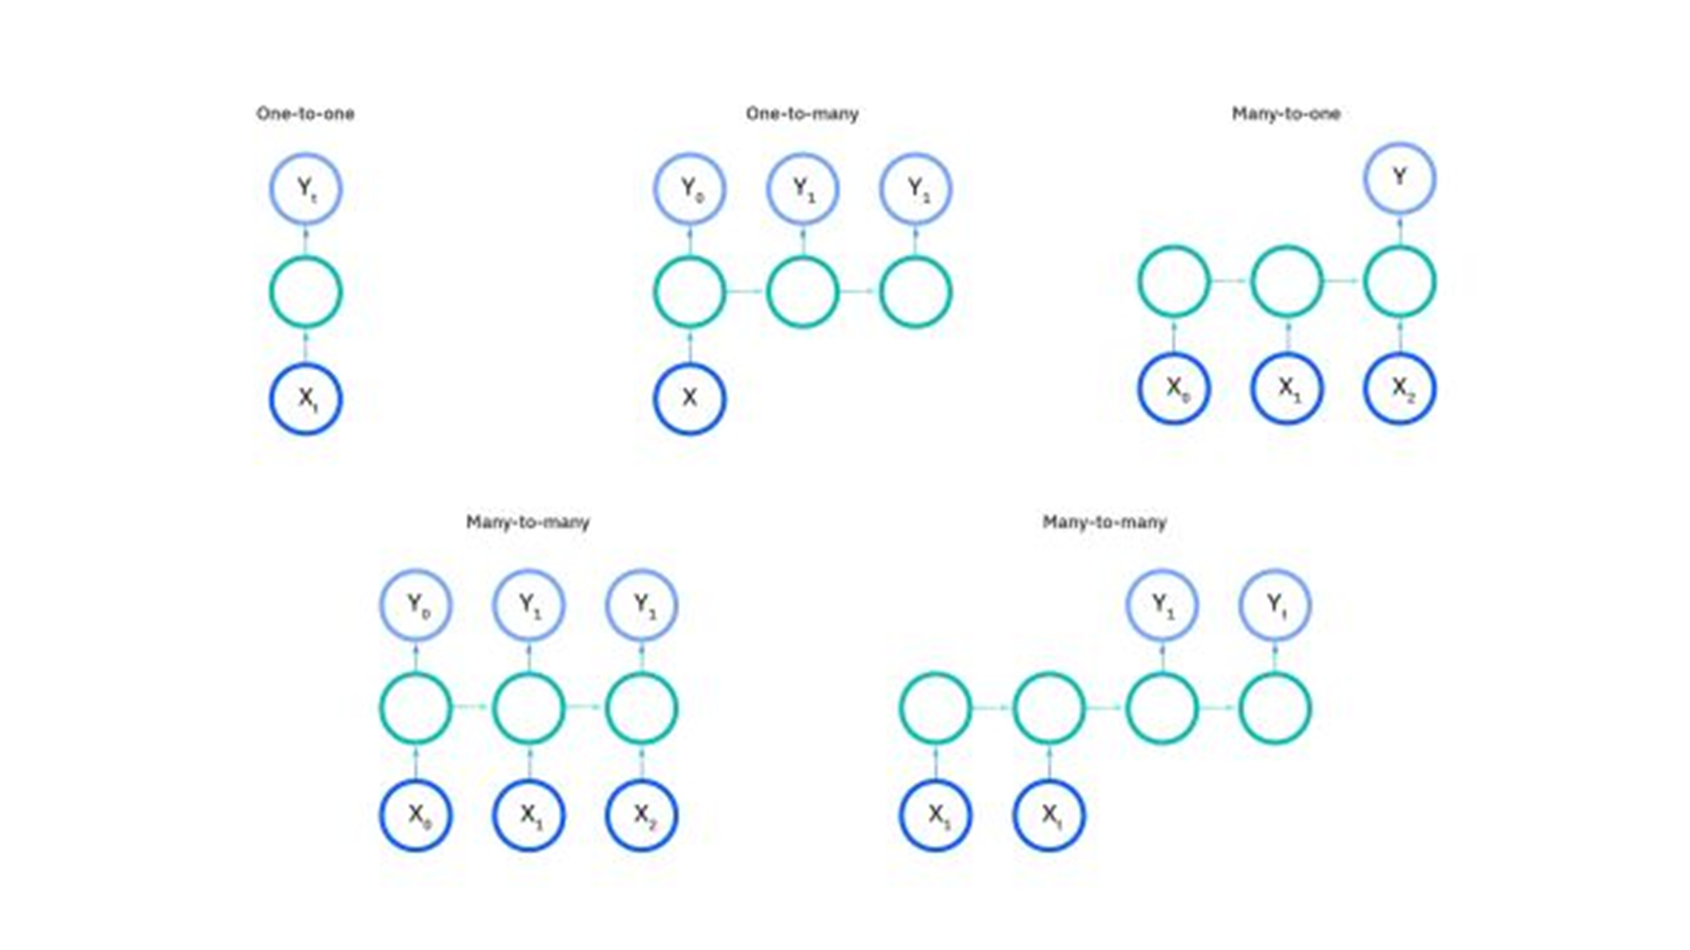

## Variant RNN architectures
# Bidirectional recurrent neural networks (BRNN): 
These are a variant network architecture of RNNs. While unidirectional RNNs can only drawn from previous inputs to make predictions about the current state, bidirectional RNNs pull in future data to improve the accuracy of it. If we return to the example of “feeling under the weather” earlier in this article, the model can better predict that the second word in that phrase is “under” if it knew that the last word in the sequence is “weather.”
# Long short-term memory (LSTM): 
This is a popular RNN architecture, which was introduced by Sepp Hochreiter and Juergen Schmidhuber as a solution to vanishing gradient problem. In their paper (link resides outside ibm.com), they work to address the problem of long-term dependencies. That is, if the previous state that is influencing the current prediction is not in the recent past, the RNN model may not be able to accurately predict the current state. As an example, let’s say we wanted to predict the italicized words in following, “Alice is allergic to nuts. She can’t eat peanut butter.” The context of a nut allergy can help us anticipate that the food that cannot be eaten contains nuts. However, if that context was a few sentences prior, then it would make it difficult, or even impossible, for the RNN to connect the information. To remedy this, LSTMs have “cells” in the hidden layers of the neural network, which have three gates–an input gate, an output gate, and a forget gate. These gates control the flow of information which is needed to predict the output in the network.  For example, if gender pronouns, such as “she”, was repeated multiple times in prior sentences, you may exclude that from the cell state.
# Gated recurrent units (GRUs): 
This RNN variant is similar the LSTMs as it also works to address the short-term memory problem of RNN models. Instead of using a “cell state” regulate information, it uses hidden states, and instead of three gates, it has two—a reset gate and an update gate. Similar to the gates within LSTMs, the reset and update gates control how much and which information to retain.

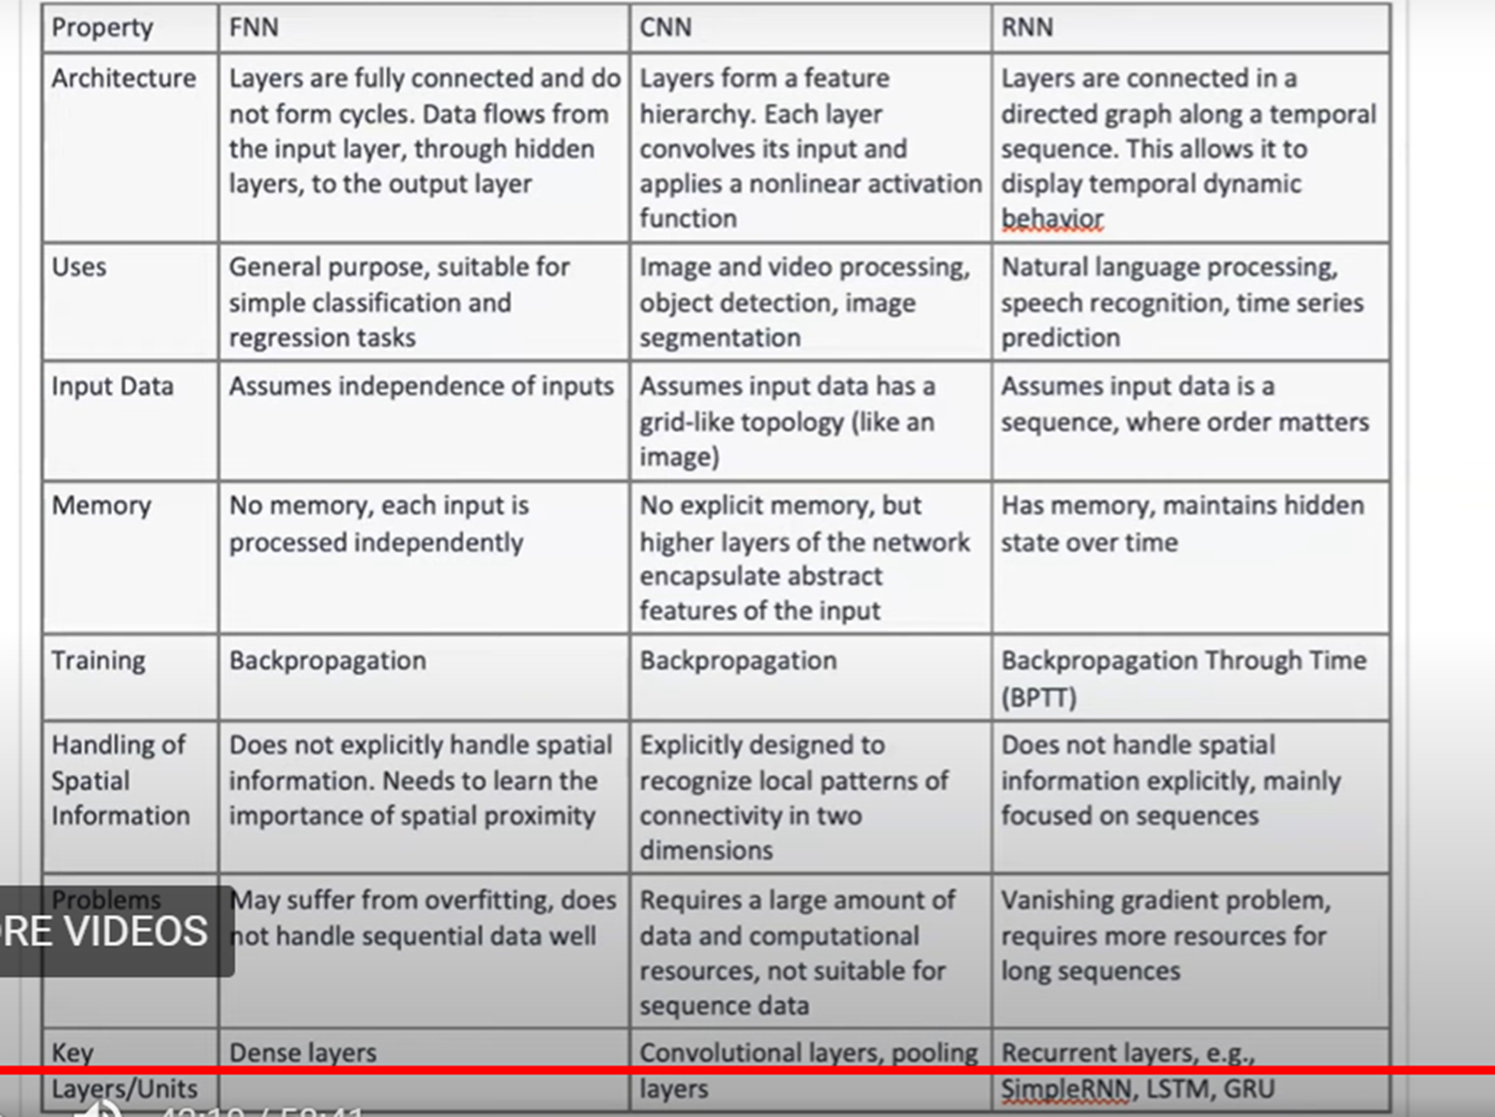

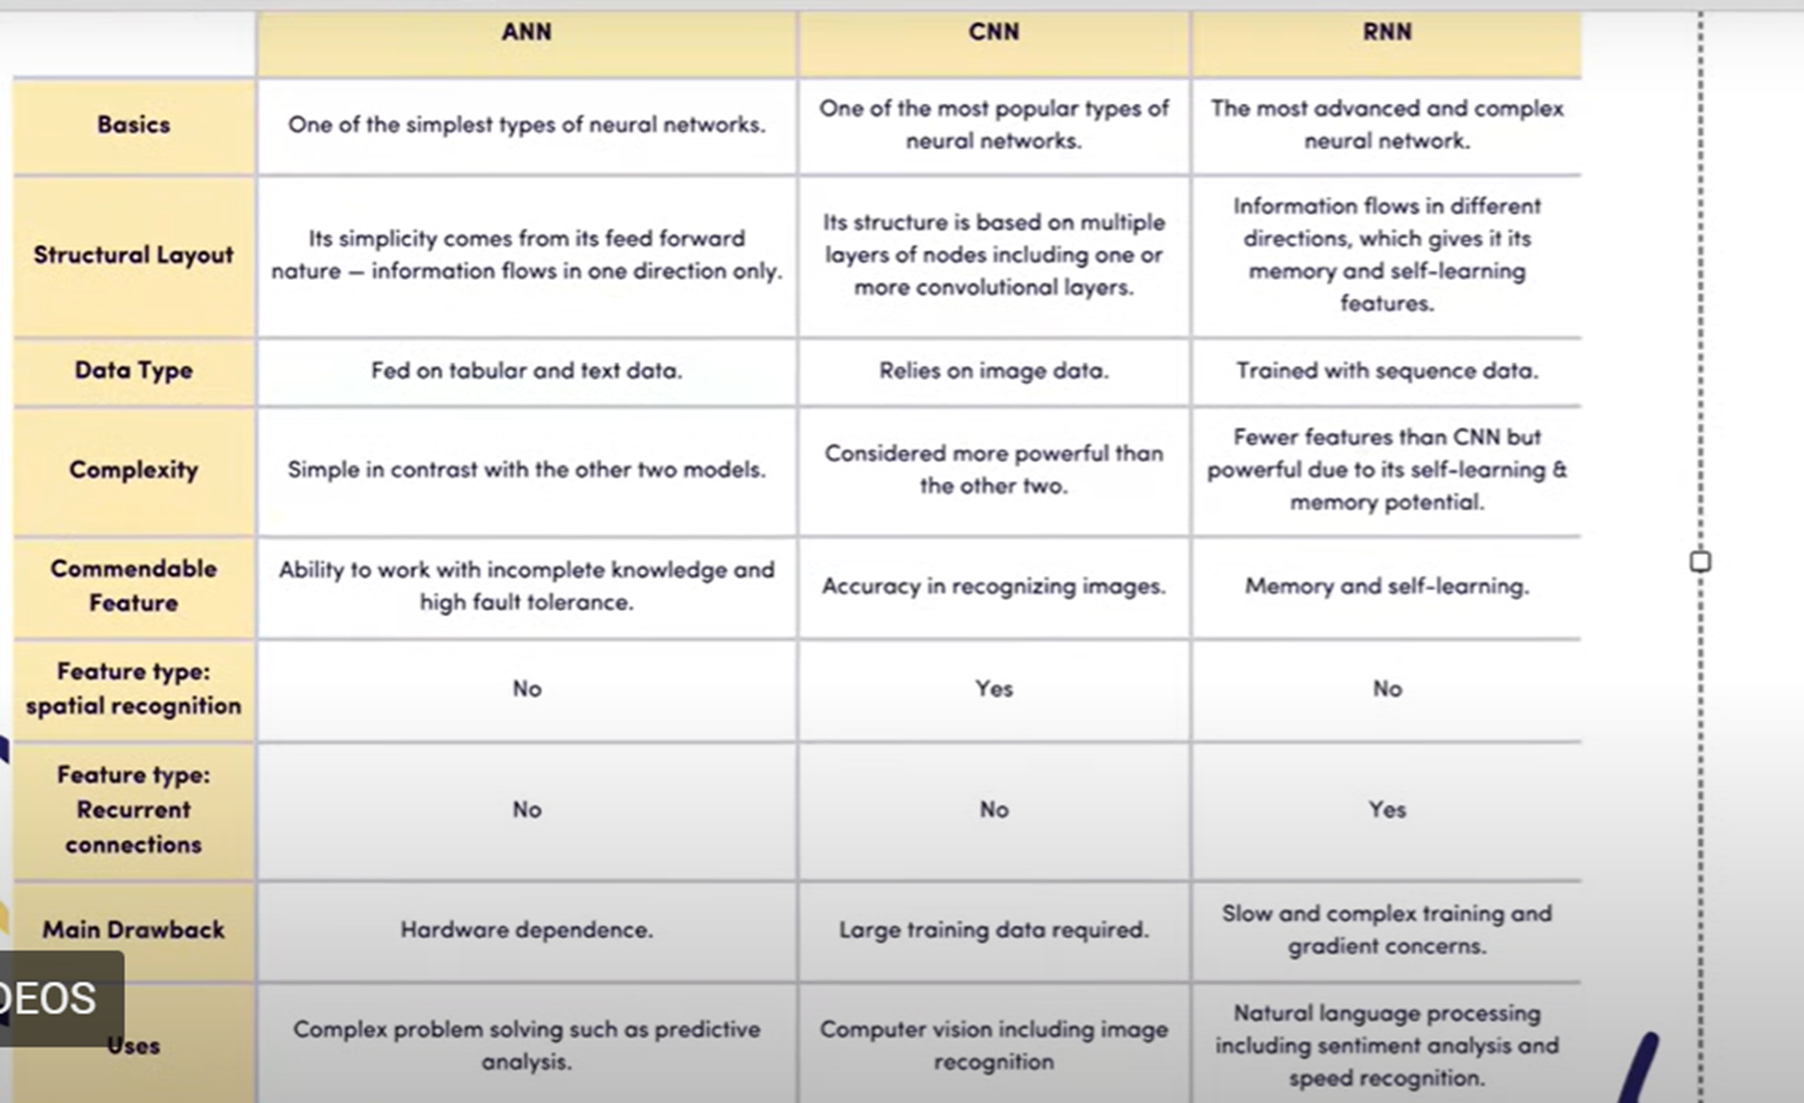

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,  SimpleRNN
from tensorflow.keras.models import Sequential
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Generate example data
X = np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))

In [8]:
X,y

(array([[[0.39600002],
         [0.23478135],
         [0.74931419],
         [0.85255111],
         [0.17171163],
         [0.5225196 ],
         [0.99075968],
         [0.24066796],
         [0.52998927],
         [0.84351254]],
 
        [[0.92513461],
         [0.86635097],
         [0.85433047],
         [0.88367005],
         [0.41409439],
         [0.84997704],
         [0.55890723],
         [0.93613683],
         [0.87888298],
         [0.07128615]],
 
        [[0.91287917],
         [0.25755996],
         [0.62143162],
         [0.21471717],
         [0.45385073],
         [0.95771453],
         [0.71776578],
         [0.12231004],
         [0.67636073],
         [0.31105268]],
 
        [[0.73450299],
         [0.20464998],
         [0.57945273],
         [0.03618788],
         [0.7521977 ],
         [0.42503498],
         [0.64533313],
         [0.95419383],
         [0.9172353 ],
         [0.11473853]],
 
        [[0.40864272],
         [0.47962365],
         [0.71953988],

In [9]:
X.shape, y.shape

((100, 10, 1), (100,))

In [11]:
model = Sequential([
    SimpleRNN(10, input_shape=(10, 1)),
    Dense(1, activation='sigmoid')
])
# Compile the model
# Adam (Adaptive Moment Estimation) is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
# Binary Cross-Entropy Used for binary classification problems.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Optimizer: Determines how the model updates its weights based on the loss function.
# Loss Function: Measures how well the model is performing by comparing the predicted outputs to the actual targets.
# Metrics: Used to evaluate the performance of the model during training and testing.

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4649 - loss: 0.7045
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5235 - loss: 0.7062  
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5525 - loss: 0.6995  
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4950 - loss: 0.7005 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4720 - loss: 0.7045 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4563 - loss: 0.7114  
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5095 - loss: 0.6957 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4917 - loss: 0.6983 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4688 - loss: 0.7034 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5280 - loss: 0.6949 


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4698 - loss: 0.7003  
Test Loss: 0.6966223120689392
Test Accuracy: 0.5
